# googlenet

##### https://static.googleusercontent.com/media/research.google.com/zh-TW//pubs/archive/43022.pdf

## inception

![](inception.PNG)

## googlenet architecture

## v4
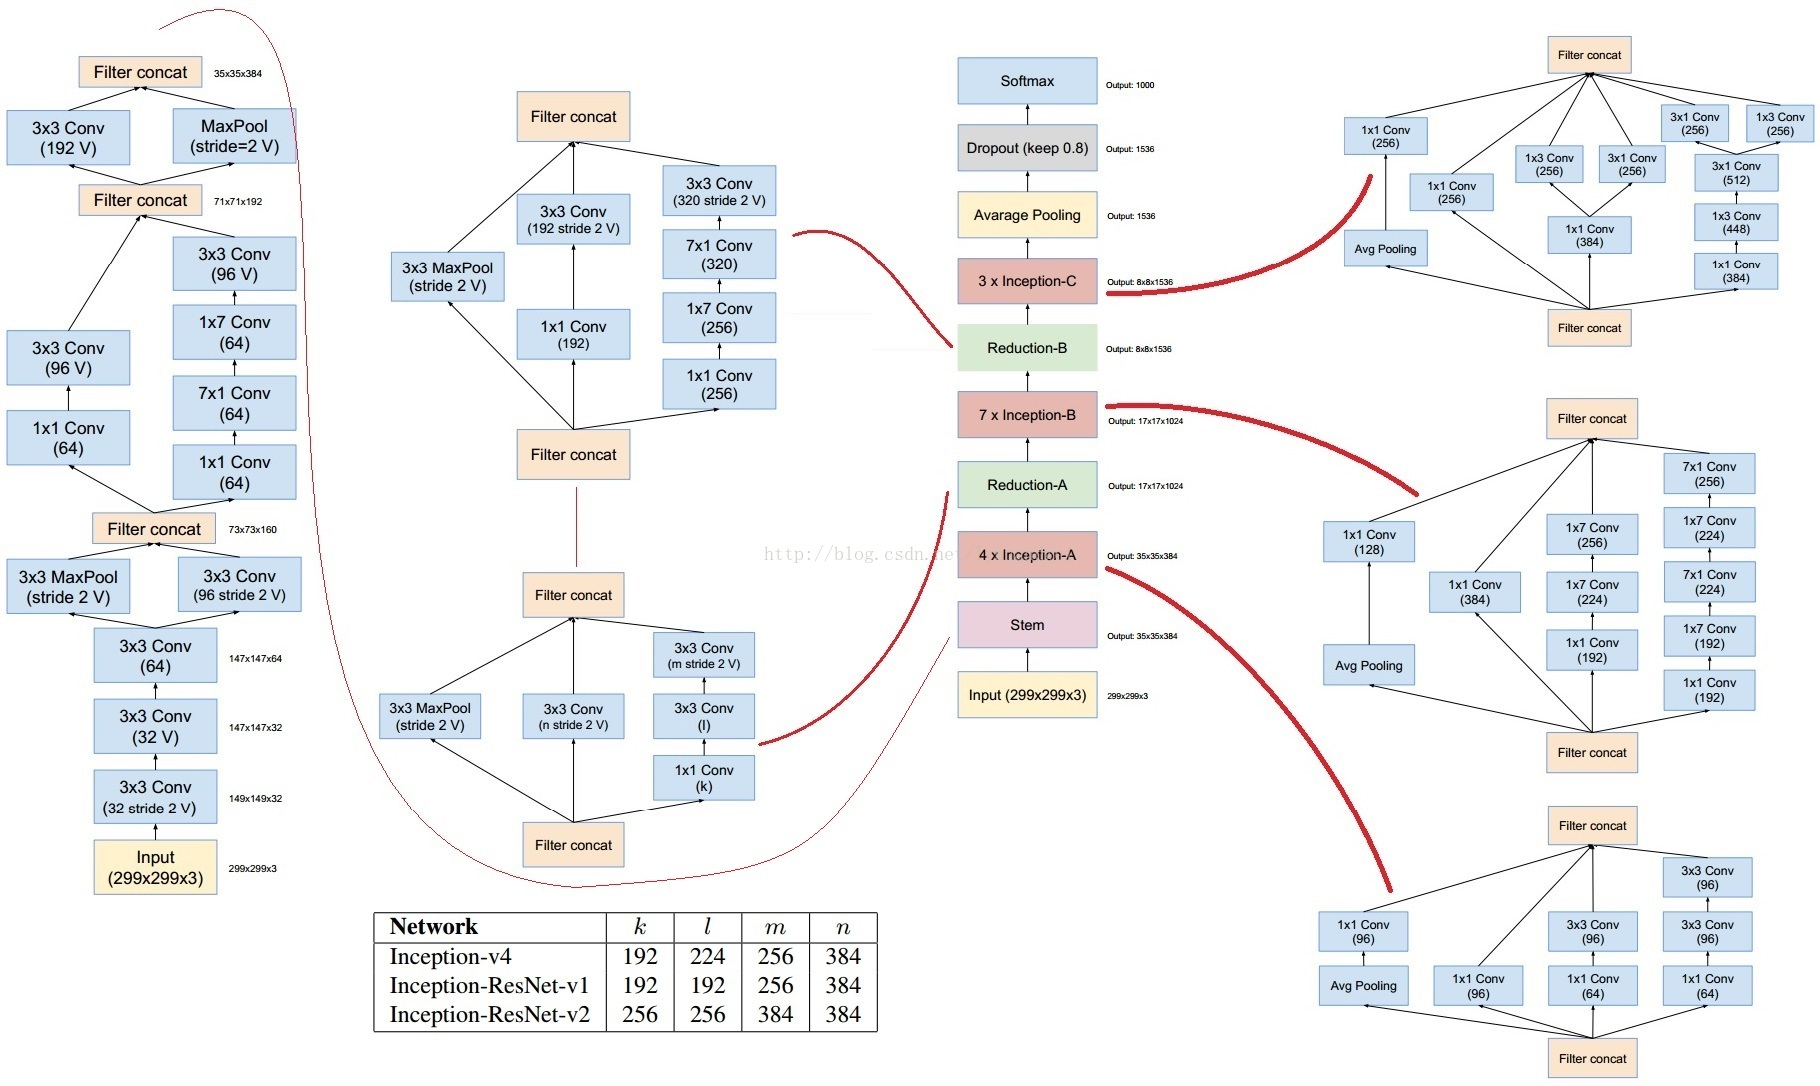

## resnet
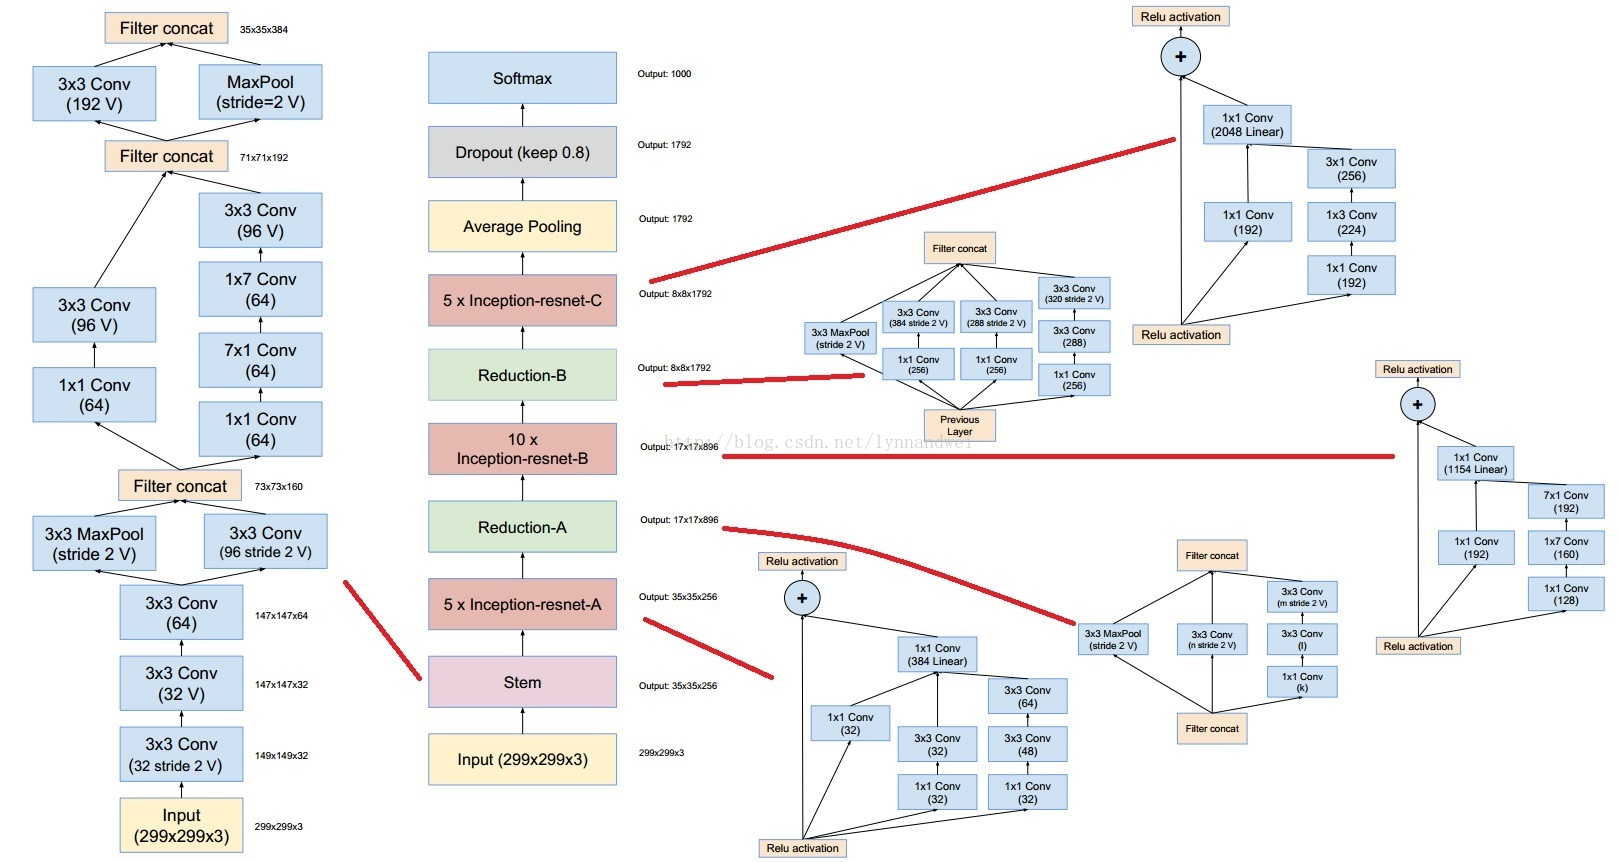

![](googlenet.PNG)

## tensorflow + googlenet

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
from tensorflow.python.ops import array_ops
from PIL import ImageFile

In [2]:
image = np.asarray(Image.open('./image.png').convert("RGB"))
print(image.shape)
image_y = np.zeros(4)
image_y[2] = 1

image = np.reshape(image, [-1, 299, 299, 3])
image_y = np.reshape(image_y, [-1, 4])

print (image.shape)
print (image_y)

(299, 299, 3)
(1, 299, 299, 3)
[[ 0.  0.  1.  0.]]


In [3]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

In [4]:
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [5]:
def conv2d(x, W, s):
    return tf.nn.conv2d(input=x, filter=W, strides=[1, s, s, 1], padding='SAME')

In [6]:
def conv2d_padval(x, W, s):
    return tf.nn.conv2d(input=x, filter=W, strides=[1, s, s, 1], padding='VALID')

In [7]:
def max_pool(x, k, s):
    return tf.nn.max_pool(x, ksize= [1, k, k, 1], strides=[1, s, s, 1], padding='SAME')
# stride [1, x_movement, y_movement, 1]def max_pool(x, k, s):

In [8]:
def max_pool_padval(x, k, s):
    return tf.nn.max_pool(x, ksize= [1, k, k, 1], strides=[1, s, s, 1], padding='VALID')
# stride [1, x_movement, y_movement, 1]def max_pool(x, k, s):

In [9]:
def avg_pool(x, k, s):
    return tf.nn.avg_pool(x, ksize= [1, k, k, 1], strides=[1, s, s, 1], padding='VALID')

In [10]:
def norm(x):
    return tf.nn.lrn(x, depth_radius=2, bias=2.0, alpha=1e-4, beta=0.75)

In [11]:
#計算準確度
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess.run(prediction, feed_dict={xs: v_xs, keep_prob: 1})
    
    print("After")
    poo=tf.shape(v_xs)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    print("After")
    poo=tf.shape(y_pre)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    print("After")
    poo=tf.shape(v_ys)
    poosee=tf.Session()
    print(poosee.run(poo))
    print("After")
    
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: 1})
    return result

#
# v_xs: input
# v_ys: output
# keep_prob是保留概率，即我们要保留的结果所占比例
# 使输入tensor中某些元素變為0，其它没變0的元素變為原来的1/keep_prob大小！

## placeholder

In [12]:
# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, 299, 299, 3])
ys = tf.placeholder(tf.float32, [None, 4])
#keep_prob = tf.placeholder(tf.float32)
#x_image = tf.reshape(xs, [-1, 224, 224, 3])    #[n_samples個數,圖長,圖寬,圖高]
#print(x_image.shape)  # [n_samples, 28,28,1]

## googlenet

In [13]:
# stem
W_conv1 = weight_variable([3,3,3,32])
b_conv1 = bias_variable([32])
r_conv1 = conv2d_padval(xs, W_conv1, 2) + b_conv1

W_conv2 = weight_variable([3,3,32,32])
b_conv2 = bias_variable([32])
r_conv2 = conv2d_padval(r_conv1, W_conv2, 1) + b_conv2

W_conv3 = weight_variable([3,3,32,64])
b_conv3 = bias_variable([64])
r_conv3 = conv2d(r_conv2, W_conv3, 1) + b_conv3

n_pool4 = max_pool_padval(r_conv3, 3, 2)

W_conv4 = weight_variable([3,3,64,96])
b_conv4 = bias_variable([96])
r_conv4 = conv2d_padval(r_conv3, W_conv4, 2) + b_conv4

m_layr4 = tf.concat([n_pool4, r_conv4], 3) #160

W_conv5_l = weight_variable([1,1,160,64])
b_conv5_l = bias_variable([64])
r_conv5_l = conv2d(m_layr4, W_conv5_l, 1) + b_conv5_l

W_conv6_l = weight_variable([3,3,64,96])
b_conv6_l = bias_variable([96])
r_conv6_l = conv2d_padval(r_conv5_l, W_conv6_l, 1) + b_conv6_l

W_conv5_r = weight_variable([1,1,160,64])
b_conv5_r = bias_variable([64])
r_conv5_r = conv2d(m_layr4, W_conv5_r, 1) + b_conv5_r

W_conv6_r = weight_variable([7,1,64,64])
b_conv6_r = bias_variable([64])
r_conv6_r = conv2d(r_conv5_r, W_conv6_r, 1) + b_conv6_r

W_conv7_r = weight_variable([1,7,64,64])
b_conv7_r = bias_variable([64])
r_conv7_r = conv2d(r_conv6_r, W_conv7_r, 1) + b_conv7_r

W_conv8_r = weight_variable([3,3,64,96])
b_conv8_r = bias_variable([96])
r_conv8_r = conv2d_padval(r_conv7_r, W_conv8_r, 1) + b_conv8_r

m_layr8 = tf.concat([r_conv6_l, r_conv8_r], 3) #192

W_conv9_l = weight_variable([3,3,192,192])
b_conv9_l = bias_variable([192])
r_conv9_l = conv2d_padval(m_layr8, W_conv9_l, 2) + b_conv9_l #stride 2

n_pool9_r = max_pool_padval(m_layr8, 2, 2)

m_layr9 = tf.concat([r_conv9_l, n_pool9_r], 3) #384

In [14]:
def inception_res_a(net0): #input 384 output 384
    net = tf.nn.relu(net0)
    #branch 0
    W_conv0 = weight_variable([1,1,384,32])
    b_conv0 = bias_variable([32])
    r_conv0 = conv2d(net, W_conv0, 1) + b_conv0
    
    #branch 1
    W_conv1_0 = weight_variable([1,1,384,32])
    b_conv1_0 = bias_variable([32])
    r_conv1_0 = conv2d(net, W_conv1_0, 1) + b_conv1_0 
    
    W_conv1_1 = weight_variable([3,3,32,32])
    b_conv1_1 = bias_variable([32])
    r_conv1_1 = conv2d(r_conv1_0, W_conv1_1, 1) + b_conv1_1 
    
    #branch 2
    W_conv2_0 = weight_variable([1,1,384,32])
    b_conv2_0 = bias_variable([32])
    r_conv2_0 = conv2d(net, W_conv2_0, 1) + b_conv2_0  
    
    W_conv2_1 = weight_variable([3,3,32,48])
    b_conv2_1 = bias_variable([48])
    r_conv2_1 = conv2d(r_conv2_0, W_conv2_1, 1) + b_conv2_1  
    
    W_conv2_2 = weight_variable([3,3,48,64])
    b_conv2_2 = bias_variable([64])
    r_conv2_2 = conv2d(r_conv2_1, W_conv2_2, 1) + b_conv2_2  
    
    net1 = array_ops.concat([r_conv0, r_conv1_1, r_conv2_2], 3)
    
    W_conv3_1 = weight_variable([1,1,128,384])
    b_conv3_1 = bias_variable([384])
    r_conv3_1 = conv2d(net1, W_conv3_1, 1) + b_conv3_1
    
    new_net = tf.add(net, r_conv3_1)
    new_net1 = tf.nn.relu(new_net)
    return new_net1

In [15]:
def reduc_a(net): #input 384 35*35 to 17*17 output 1152
    #branch 0
    n_pool0 = max_pool_padval(net, 3, 2)
    
    #branch 1
    W_conv1_0 = weight_variable([3,3,384,384])
    b_conv1_0 = bias_variable([384])
    r_conv1_0 = conv2d_padval(net, W_conv1_0, 2) + b_conv1_0 
    
    #branch 2
    W_conv2_0 = weight_variable([1,1,384,256])
    b_conv2_0 = bias_variable([256])
    r_conv2_0 = conv2d(net, W_conv2_0, 1) + b_conv2_0  
    
    W_conv2_1 = weight_variable([3,3,256,256])
    b_conv2_1 = bias_variable([256])
    r_conv2_1 = conv2d(r_conv2_0, W_conv2_1, 1) + b_conv2_1  
    
    W_conv2_2 = weight_variable([3,3,256,384])
    b_conv2_2 = bias_variable([384])
    r_conv2_2 = conv2d_padval(r_conv2_1, W_conv2_2, 2) + b_conv2_2  
    
    new_net = array_ops.concat([n_pool0, r_conv1_0, r_conv2_2], 3)
    
    return new_net

In [16]:
    inception_res_a1 = inception_res_a(m_layr9)
    inception_res_a2 = inception_res_a(inception_res_a1)
    inception_res_a3 = inception_res_a(inception_res_a2)
    inception_res_a4 = inception_res_a(inception_res_a3)
    inception_res_a5 = inception_res_a(inception_res_a4)
    reduct_incepa = reduc_a(inception_res_a5)

In [17]:
def inception_res_b(net0): #inpur 1152 output 1152 #change 1154 to 1152
    net = tf.nn.relu(net0)
    #branch 0
    W_conv0 = weight_variable([1,1,1152,192])
    b_conv0 = bias_variable([192])
    r_conv0 = conv2d(net, W_conv0, 1) + b_conv0
    
    #branch 1
    W_conv1_0 = weight_variable([1,1,1152,128])
    b_conv1_0 = bias_variable([128])
    r_conv1_0 = conv2d(net, W_conv1_0, 1) + b_conv1_0  
    
    W_conv1_1 = weight_variable([1,7,128,160])
    b_conv1_1 = bias_variable([160])
    r_conv1_1 = conv2d(r_conv1_0, W_conv1_1, 1) + b_conv1_1  
    
    W_conv1_2 = weight_variable([7,1,160,192])
    b_conv1_2 = bias_variable([192])
    r_conv1_2 = conv2d(r_conv1_1, W_conv1_2, 1) + b_conv1_2  
    
    net1 = array_ops.concat([r_conv0, r_conv1_2], 3)
    
    W_conv3_1 = weight_variable([1,1,384,1152]) #change 1154 to 1152
    b_conv3_1 = bias_variable([1152])
    r_conv3_1 = conv2d(net1, W_conv3_1, 1) + b_conv3_1
    
    new_net = tf.add(net, r_conv3_1)
    new_net1 = tf.nn.relu(new_net)
    return new_net1

In [18]:
def reduc_b(net): #input 1152 17*17 to 8*8 output 2144 #change 1154 to 1152
    #branch 0
    n_pool0 = max_pool_padval(net, 3, 2)
    
    #branch 1
    W_conv1_0 = weight_variable([1,1,1152,256])
    b_conv1_0 = bias_variable([256])
    r_conv1_0 = conv2d(net, W_conv1_0, 1) + b_conv1_0 
    
    W_conv1_1 = weight_variable([3,3,256,384])
    b_conv1_1 = bias_variable([384])
    r_conv1_1 = conv2d_padval(r_conv1_0, W_conv1_1, 2) + b_conv1_1 
    
    #branch 2
    W_conv2_0 = weight_variable([1,1,1152,256])
    b_conv2_0 = bias_variable([256])
    r_conv2_0 = conv2d(net, W_conv2_0, 1) + b_conv2_0 
    
    W_conv2_1 = weight_variable([3,3,256,288])
    b_conv2_1 = bias_variable([288])
    r_conv2_1 = conv2d_padval(r_conv2_0, W_conv2_1, 2) + b_conv2_1 
    
    #branch 3
    W_conv3_0 = weight_variable([1,1,1152,256])
    b_conv3_0 = bias_variable([256])
    r_conv3_0 = conv2d(net, W_conv3_0, 1) + b_conv3_0  
    
    W_conv3_1 = weight_variable([3,3,256,288])
    b_conv3_1 = bias_variable([288])
    r_conv3_1 = conv2d(r_conv3_0, W_conv3_1, 1) + b_conv3_1  
    
    W_conv3_2 = weight_variable([3,3,288,320])
    b_conv3_2 = bias_variable([320])
    r_conv3_2 = conv2d_padval(r_conv3_1, W_conv3_2, 2) + b_conv3_2
    
    new_net = array_ops.concat([n_pool0, r_conv1_1, r_conv2_1, r_conv3_2], 3)
    
    return new_net

In [19]:
inception_res_b1 = inception_res_b(reduct_incepa)
inception_res_b2 = inception_res_b(inception_res_b1)
inception_res_b3 = inception_res_b(inception_res_b2)
inception_res_b4 = inception_res_b(inception_res_b3)
inception_res_b5 = inception_res_b(inception_res_b4)
inception_res_b6 = inception_res_b(inception_res_b5)
inception_res_b7 = inception_res_b(inception_res_b6)
inception_res_b8 = inception_res_b(inception_res_b7)
inception_res_b9 = inception_res_b(inception_res_b8)
inception_res_b10 = inception_res_b(inception_res_b9)
reduct_incepb = reduc_b(inception_res_b10)

In [20]:
def inception_res_c(net0): #inpur 2144 output 2144 #change 2048 to 2144
    net = tf.nn.relu(net0)
    #branch 0
    W_conv0 = weight_variable([1,1,2144,192])
    b_conv0 = bias_variable([192])
    r_conv0 = conv2d(net, W_conv0, 1) + b_conv0
    
    #branch 1
    W_conv1_0 = weight_variable([1,1,2144,192])
    b_conv1_0 = bias_variable([192])
    r_conv1_0 = conv2d(net, W_conv1_0, 1) + b_conv1_0  
    
    W_conv1_1 = weight_variable([1,3,192,224])
    b_conv1_1 = bias_variable([224])
    r_conv1_1 = conv2d(r_conv1_0, W_conv1_1, 1) + b_conv1_1  
    
    W_conv1_2 = weight_variable([3,1,224,256])
    b_conv1_2 = bias_variable([256])
    r_conv1_2 = conv2d(r_conv1_1, W_conv1_2, 1) + b_conv1_2  
    
    net1 = array_ops.concat([r_conv0, r_conv1_2], 3)
    
    W_conv3_1 = weight_variable([1,1,448,2144])
    b_conv3_1 = bias_variable([2144])
    r_conv3_1 = conv2d(net1, W_conv3_1, 1) + b_conv3_1
    
    new_net = tf.add(net, r_conv3_1)
    new_net1 = tf.nn.relu(new_net)
    return new_net1

In [21]:
inception_res_c1 = inception_res_c(reduct_incepb)
inception_res_c2 = inception_res_c(inception_res_c1)
inception_res_c3 = inception_res_c(inception_res_c2)
inception_res_c4 = inception_res_c(inception_res_c3)
inception_res_c5 = inception_res_c(inception_res_c4)

a_pool = avg_pool(inception_res_c5, 8, 1)

#change 2144
n_drop = tf.nn.dropout(a_pool, keep_prob=0.8)
n_reshape = tf.reshape(n_drop, [-1, 2144])

W_fc_soft = weight_variable([2144, 4])  #our label = 4
b_fc_soft = bias_variable([4])

prediction = tf.nn.softmax(tf.matmul(n_reshape, W_fc_soft) + b_fc_soft)

In [22]:
cross_entropy = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
lr = 0.01
train_step = tf.train.MomentumOptimizer(learning_rate=lr, momentum=0.9).minimize(cross_entropy)

In [23]:
correct_prediction = tf.equal(tf.argmax(prediction,1), tf.argmax(ys,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [24]:
def print_filter(layer, filter_size, num):
    i = 0
    filter_no = 0
    _print = ''
    
    for i in range(filter_size):
        _print = ''
        for j in range(filter_size):
            _print = _print + str(sess.run(layer[i,j,num,0])) + '\t'
        print (_print)

In [25]:
sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [26]:
for i in range(1000):
    sess.run(train_step, feed_dict={xs:image, ys:image_y})
    #if i == 1:
    #    print_filter(W_conv1, 7, 2)
    if i % 8 == 0:
        lr = lr * 0.96
    if i % 100 ==0:
        train_accuracy = sess.run(accuracy, feed_dict={xs:image, ys:image_y})
        train_loss = sess.run(cross_entropy, feed_dict={xs:image, ys:image_y})
        print("epoch: {}, training accuracy: {:.12f}, loss: {:.6f}".format(i, train_accuracy, train_loss))
        print (sess.run(prediction, feed_dict={xs:image, ys:image_y}))
    

epoch: 0, training accuracy: 0.000000000000, loss: 2.000000
[[ 1.  0.  0.  0.]]
epoch: 100, training accuracy: 0.000000000000, loss: 2.000000
[[ 1.  0.  0.  0.]]


KeyboardInterrupt: 

In [ ]:
print_filter(W_conv1, 7, 2)